# email spam classifier -nlp project

In [17]:
import numpy as np
import pandas as pd

In [18]:
df =pd.read_csv('email_spam.csv')


In [21]:
df.sample(15)


,Category,Message
200,ham,"Found it, ENC &lt;#&gt; , where you at?"
2791,spam,U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
4089,ham,He needs to stop going to bed and make with th...
3357,ham,Ok not a problem will get them a taxi. C ing ...
3655,ham,Why i come in between you people
393,ham,Morning only i can ok.
5143,ham,Hi darlin im on helens fone im gonna b up the ...
814,ham,I borrow ur bag ok.
4818,ham,Me too. Mark is taking forever to pick up my p...
2765,ham,Open rebtel with firefox. When it loads just p...


In [23]:
import numpy as np
import pandas as pd

In [26]:
df =pd.read_csv('email_spam.csv')

In [28]:
df.shape

(5572, 2)

# basic data cleaning



In [31]:
# checking if there any null values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [33]:
# dataset dosen't have any null values, so no need of dropping

In [34]:
#applying labelEncoder ( to change ham/spam to 0/1 respectively)
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()


In [35]:
encode.fit_transform(df['Category'])

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
df['Category'] = encode.fit_transform(df['Category'])

In [37]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
#checking missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [45]:
# checking duplicate values
df.duplicated().sum()

415

In [46]:
# removing duplicates
df= df.drop_duplicates(keep='first')

In [49]:
df.duplicated().sum()

0

In [51]:
df.shape

(5157, 2)

# EDA



In [54]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [58]:
# to represt ham and spam in our datasets betterly we are representing it in form of pi charts

([<matplotlib.patches.Wedge at 0x197306f58d0>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.6'),
  Text(0.5548334056198901, -0.22838540235364085, '12.4')])

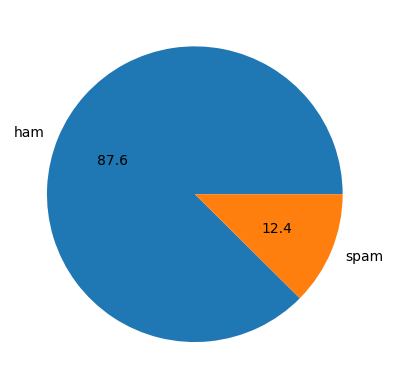

In [60]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.1f") 


In [61]:
## data is imbalanced (there is more ham and very less spam) ##

In [62]:
import nltk

In [63]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
# no_characters        :  length of each message in terms of no. of characters
df['no_characters'] = df['Message'].apply(len)

In [66]:
df.head()


,Category,Message,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [67]:
# no_words   : we use (nltk word_tokenization function) to break the message into words)
df['no_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [68]:
df.head()

,Category,Message,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [69]:
# no_sentence   : sent_tokenize function breaks messages into parts of sentences.
df['no_sentence'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [70]:
df.head()

,Category,Message,no_characters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [73]:
df[['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
#using this describe function we can seperate spam and ham emails
# for spam (1)
df[df['Category'] ==1][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [75]:
# for_ham (0)    ( spam messages have more no of characters/words/sentences than ham)
df[df['Category'] ==0][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
# showing the difference in characters in spam and ham through histogram plots
import seaborn as sns

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_characters', ylabel='Count'>

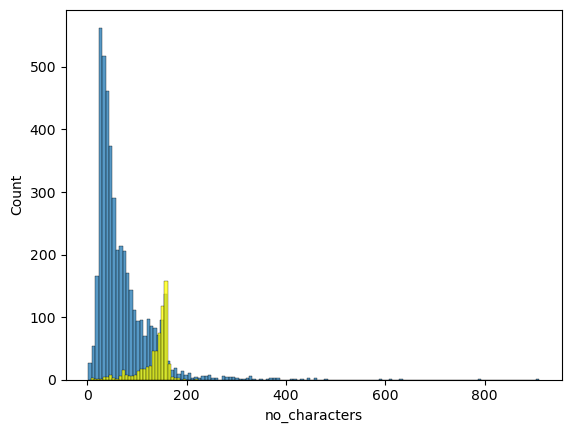

In [77]:
sns.histplot(df[df['Category']==0]['no_characters'])
sns.histplot(df[df['Category']==1]['no_characters'],color='yellow')

# data preprocessing



In [79]:
# lower case
def transform_Message(Message):
    Message = Message.lower()
   #tokenisation
    Message = nltk.word_tokenize(Message)

    # now text is a list, so we run a loop
    y=[]
    
    for i in Message:
        if i.isalnum():  # if i is alphanumeric it gets appended
            y.append(i)
     #removal of stopwords and punctuations
    Message = y[:]  # Use y here, which contains alphanumeric words
    y.clear()
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            #lemmatization 
    text = y[:]  # Make a copy of y before clearing it for stemming
    y.clear()
    for i in text:  # Use text, not Message here
        y.append(ps.stem(i))
         
    return " ".join(y)




In [80]:
transform_Message('I am working on NLP project on Emails ....%')

NameError: name 'stopwords' is not defined

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
import string
string.punctuation

In [ ]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('hiding')


In [ ]:
df['Message'][244]

In [ ]:
transform_Message("Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched...")

In [ ]:
df['transformed_Message'] =df['Message'].apply(transform_Message)

In [ ]:
df.head()

In [ ]:


from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color='black')

In [ ]:
# concatanates the entire text into one sting seperated by spaces
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_Message'].str.cat(sep=" "))

In [ ]:
# shows the common words usd in spam emails
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_Message'].str.cat(sep=" "))

In [ ]:
# shows the common words used in ham mails 
plt.imshow(ham_wc)

In [ ]:
df.head()

In [ ]:
# converts message into words in list form
spam_corpus = []

for msg in df[df['Category'] == 1]['transformed_Message'].tolist():  
    for word in msg.split(): 
        spam_corpus.append(word) 


In [ ]:
len(spam_corpus)

In [ ]:
#top 50 most occoured words in spam  mails represented as bar plot
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
ham_corpus = []

for msg in df[df['Category'] == 0]['transformed_Message'].tolist():  
    for word in msg.split(): 
        ham_corpus.append(word) 



In [ ]:
len(ham_corpus)

In [ ]:
#top 50 most occoured words in ham mails represented as bar plot
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# feature engineering




In [ ]:
# to convert input (transformed_messages) into vectors we use naivebayes and also Tfid

In [ ]:
#for vectorising
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # best result will come at 3000 only for tfidf 

In [ ]:
X= tfidf.fit_transform(df['transformed_Message']).toarray()


In [ ]:
X.shape

In [ ]:
y = df['Category'].values

In [ ]:
y


# Data modeling





In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)  # Corrected to use 'bnb' instead of 'mnb'
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

In [ ]:
#tfidf --> MNB

In [ ]:
# models from classificaton algorithms (tested)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# made objects for all ml models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
#keys: algorithm names, values: objects ( created dictionaries)
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
# create a  function which has classifier and training,testing data and caluculate precission and accuracy 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
#example
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
# create a  function which has classifier and training,testing data and caluculate precission and accuracy 

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
# we are storing these values in a dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:

# plotted a graph for accuracy and precession score ( so that we can know which algorithm to use ie which has more precission score and also a good accuracy score)
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()




# MODEL IMPROVEMENT


In [ ]:
# i had changed the max_features parameters of TFidfvectoriser to 3000.

In [ ]:
temp_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled=performance_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


In [ ]:
# pickle
import pickle
pickle.dump(tfidf,open('vectorizes.pkl','wb'))
pickle.dump(mnb,open('models.pkl','wb'))
